## Digit Recognizer using SVM

In [25]:
#Modules

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import seaborn as sns
from sklearn.datasets import load_digits
import warnings
import mglearn
warnings.filterwarnings("ignore")

In [2]:
dataset = load_digits()
print(dataset.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
X = pd.DataFrame(dataset.data,columns=dataset.feature_names)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [4]:
Y = pd.DataFrame(dataset.target,columns=['Digit'])
Y.head()

,Digit
0,0
1,1
2,2
3,3
4,4


In [5]:
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
X.isna().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_3    0
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
Length: 64, dtype: int64

In [7]:
Y.isna().sum()

Digit    0
dtype: int64

# DATA VISUALIZATION

### Counting number of digit per type in dataset

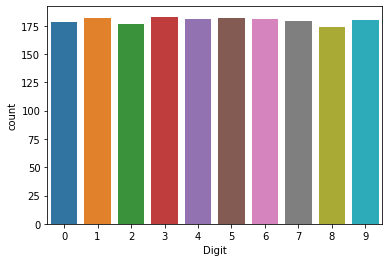

labels counts are :  [178 182 177 183 181 182 181 179 174 180]


In [8]:
sns.countplot(Y['Digit'])
plt.show()
print("labels counts are : ",np.bincount(Y['Digit']))

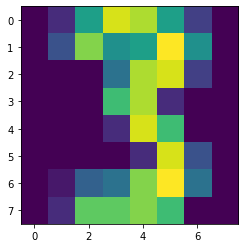

In [9]:
# its 3

label = X.iloc[13,0:].values.reshape(8,8)
plt.imshow(label)
plt.show()

# PreProcessing

In [10]:
#standardization of data

X.fillna(0);Y.fillna(0)

scale = StandardScaler()
Xs = scale.fit_transform(X)
Xs = pd.DataFrame(Xs,columns=dataset.feature_names)
Xs.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008


### Spitting Dataset

In [11]:
x_train , x_test , y_train , y_test = train_test_split(Xs,Y,test_size=0.2,random_state=42)
(x_train.shape,x_test.shape)

((1437, 64), (360, 64))

# 

In [12]:
model = SVC()
model.fit(x_train,y_train)

SVC()

In [13]:
y_pred = model.predict(x_test)
train_Acc = model.score(x_train,y_train)
test_Acc = model.score(x_test,y_test)
print("Train Accuracy of This model is : ",train_Acc*100)
print("Test Accuracy of This model is : ",test_Acc*100)

Train Accuracy of This model is :  99.72164231036882
Test Accuracy of This model is :  98.05555555555556


### Confusion Matrix and Classification Report

In [14]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  1  0  0 32  0  1]
 [ 0  0  0  0  1  0  0  0 29  0]
 [ 0  0  0  0  0  1  0  0  1 38]]


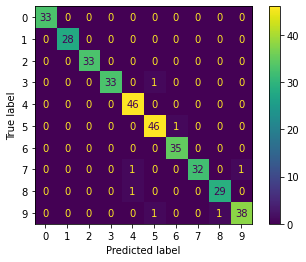

In [15]:
# Confusion matrix

mat = confusion_matrix(y_test,y_pred)
print(mat)
plot_confusion_matrix(model,x_test,y_test)
plt.show()

In [16]:
# Classification Report

report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.96      1.00      0.98        46
           5       0.96      0.98      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



# Prediction

In [17]:
# Predict Value
pred = model.predict(Xs)

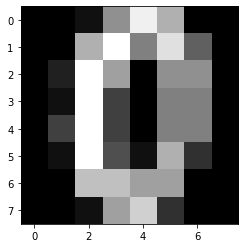

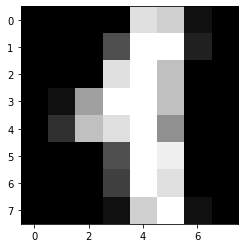

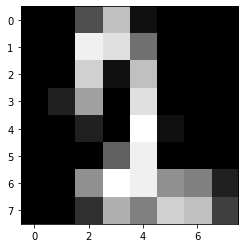

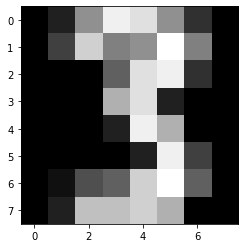

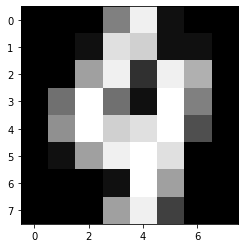

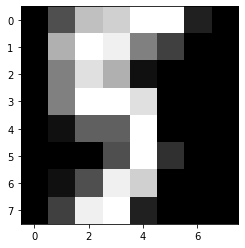

In [18]:
# Actual Value
# its 3
for i in ([10,11,12,13,14,15]):
    plt.imshow(X.iloc[i,0:].values.reshape(8,8),cmap='gray',)
    plt.show()

In [19]:
for i in ([10,11,12,13,14,15]):
    print(pred[i],end=" ")

0 1 2 3 4 5 

# plots

### if we increase C value than

In [20]:
c = [0.001,0.1,1,10,100,1000]
test_acc = []
train_acc = []


for i in c:
    
    mod = SVC(C=i)
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    train_Acc = mod.score(x_train,y_train)
    test_Acc = mod.score(x_test,y_test)
    train_acc.append(train_Acc)
    test_acc.append(test_Acc)
    print("Train Accuracy for C = {} of This model is : {:.2f}".format(i,train_Acc*100))
    print("Test Accuracy for C = {} of This model is : {:.2f}".format(i,test_Acc*100))
    print()    

Train Accuracy for C = 0.001 of This model is : 10.72
Test Accuracy for C = 0.001 of This model is : 7.78

Train Accuracy for C = 0.1 of This model is : 95.48
Test Accuracy for C = 0.1 of This model is : 94.72

Train Accuracy for C = 1 of This model is : 99.72
Test Accuracy for C = 1 of This model is : 98.06

Train Accuracy for C = 10 of This model is : 100.00
Test Accuracy for C = 10 of This model is : 98.06

Train Accuracy for C = 100 of This model is : 100.00
Test Accuracy for C = 100 of This model is : 98.06

Train Accuracy for C = 1000 of This model is : 100.00
Test Accuracy for C = 1000 of This model is : 98.06



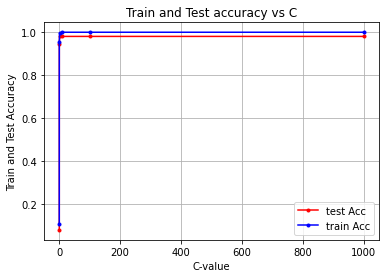

In [24]:
# C vs Train And Test Accuracy

plt.plot(c,test_acc,'r.-',label="test Acc")
plt.plot(c,train_acc,'b.-',label="train Acc")
plt.title('Train and Test accuracy vs C')
plt.xlabel('C-value')
plt.ylabel('Train and Test Accuracy')
plt.grid(True)
plt.legend()
plt.show()

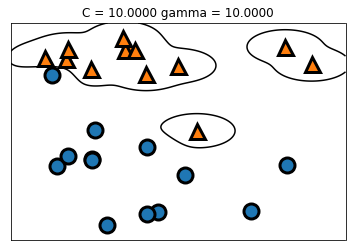

In [30]:
mglearn.plots.plot_svm(log_C=1,log_gamma=1)

    Thanks 